In [ ]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import snscrape.modules.twitter as tw
import pandas as pd
from google.colab import files

In [ ]:
query = "banking and financial services"
tweets = []
limit = 1000
for tweet in tw.TwitterSearchScraper(query).get_items():
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date,tweet.username,tweet.content])
df = pd.DataFrame(tweets,columns=['Date','Username','Tweet'])
df

,Date,Username,Tweet
0,2022-05-27 06:32:14+00:00,JacobsRaffy,through the merger of Citizens with and into t...
1,2022-05-27 00:12:37+00:00,acwalter23,@RileyPierceYVR One thing I would suggest just...
2,2022-05-26 22:03:12+00:00,porthiadays,@BlokeOnWheels @gardnerneil094 @MouseAndProud ...
3,2022-05-26 19:37:00+00:00,HanoverSearch,Here's a concise step-by-step guide to handlin...
4,2022-05-26 19:26:41+00:00,asaeACHQ,"Vice President, Innovation Public Policy (Bank..."
...,...,...,...
995,2022-04-14 19:03:29+00:00,jmspool,M&amp;T Bank seeks a Senior Service Designer t...
996,2022-04-14 18:29:33+00:00,avazinvestBEK,The new #generation #digital #banks are #finan...
997,2022-04-14 18:07:32+00:00,ExchangeNews,"""Working On ‘Team Cyber’"" - Remarks Before The..."
998,2022-04-14 17:10:32+00:00,JumpstartCDN,Interested in pursuing a career in financial s...


In [ ]:
df.to_csv('Tweets.csv')

In [ ]:
files.download('Tweets.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import re
def Tweet_cleaner(text):
  text = re.sub(r'@[A-Za-z0-9]+', '',text)
  text = re.sub(r'#', '',text)
  text = re.sub(r'RT[\s]+', '',text)
  return text
df['Tweet'] = df['Tweet'].apply(Tweet_cleaner)
df

,Date,Username,Tweet
0,2022-05-27 06:32:14+00:00,JacobsRaffy,through the merger of Citizens with and into t...
1,2022-05-27 00:12:37+00:00,acwalter23,One thing I would suggest just in general is ...
2,2022-05-26 22:03:12+00:00,porthiadays,_JAWS _PSN _honey _winston ...
3,2022-05-26 19:37:00+00:00,HanoverSearch,Here's a concise step-by-step guide to handlin...
4,2022-05-26 19:26:41+00:00,asaeACHQ,"Vice President, Innovation Public Policy (Bank..."
...,...,...,...
995,2022-04-14 19:03:29+00:00,jmspool,M&amp;T Bank seeks a Senior Service Designer t...
996,2022-04-14 18:29:33+00:00,avazinvestBEK,The new generation digital banks are financial...
997,2022-04-14 18:07:32+00:00,ExchangeNews,"""Working On ‘Team Cyber’"" - Remarks Before The..."
998,2022-04-14 17:10:32+00:00,JumpstartCDN,Interested in pursuing a career in financial s...


In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from textblob import TextBlob
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['Polarity'] = df['Tweet'].apply(getPolarity)

df

,Date,Username,Tweet,Subjectivity,Polarity
0,2022-05-27 06:32:14+00:00,JacobsRaffy,through the merger of Citizens with and into t...,0.000000,0.000000
1,2022-05-27 00:12:37+00:00,acwalter23,One thing I would suggest just in general is ...,0.666667,0.183333
2,2022-05-26 22:03:12+00:00,porthiadays,_JAWS _PSN _honey _winston ...,0.100000,0.100000
3,2022-05-26 19:37:00+00:00,HanoverSearch,Here's a concise step-by-step guide to handlin...,0.375000,0.050000
4,2022-05-26 19:26:41+00:00,asaeACHQ,"Vice President, Innovation Public Policy (Bank...",0.022222,0.000000
...,...,...,...,...,...
995,2022-04-14 19:03:29+00:00,jmspool,M&amp;T Bank seeks a Senior Service Designer t...,0.066667,-0.033333
996,2022-04-14 18:29:33+00:00,avazinvestBEK,The new generation digital banks are financial...,0.151515,0.045455
997,2022-04-14 18:07:32+00:00,ExchangeNews,"""Working On ‘Team Cyber’"" - Remarks Before The...",0.200000,-0.033333
998,2022-04-14 17:10:32+00:00,JumpstartCDN,Interested in pursuing a career in financial s...,0.391667,0.239583


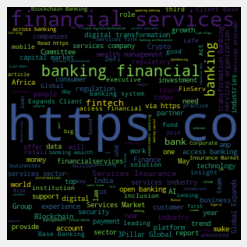

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
All_Tweets = ' '.join([ twts for twts in df['Tweet']])
wordCloud = WordCloud(width = 300,height = 300,random_state = 45,max_font_size = 120).generate(All_Tweets)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
def Tweet_Analysis(score):
  if score<0:
    return 'Negative Tweet'
  elif score==0:
    return 'Neutral Tweet'
  else:
    return 'Positive Tweet'

df['Tweet_type'] = df['Polarity'].apply(Tweet_Analysis)
df

,Date,Username,Tweet,Subjectivity,Polarity,Tweet_type
0,2022-05-27 06:32:14+00:00,JacobsRaffy,through the merger of Citizens with and into t...,0.000000,0.000000,Neutral Tweet
1,2022-05-27 00:12:37+00:00,acwalter23,One thing I would suggest just in general is ...,0.666667,0.183333,Positive Tweet
2,2022-05-26 22:03:12+00:00,porthiadays,_JAWS _PSN _honey _winston ...,0.100000,0.100000,Positive Tweet
3,2022-05-26 19:37:00+00:00,HanoverSearch,Here's a concise step-by-step guide to handlin...,0.375000,0.050000,Positive Tweet
4,2022-05-26 19:26:41+00:00,asaeACHQ,"Vice President, Innovation Public Policy (Bank...",0.022222,0.000000,Neutral Tweet
...,...,...,...,...,...,...
995,2022-04-14 19:03:29+00:00,jmspool,M&amp;T Bank seeks a Senior Service Designer t...,0.066667,-0.033333,Negative Tweet
996,2022-04-14 18:29:33+00:00,avazinvestBEK,The new generation digital banks are financial...,0.151515,0.045455,Positive Tweet
997,2022-04-14 18:07:32+00:00,ExchangeNews,"""Working On ‘Team Cyber’"" - Remarks Before The...",0.200000,-0.033333,Negative Tweet
998,2022-04-14 17:10:32+00:00,JumpstartCDN,Interested in pursuing a career in financial s...,0.391667,0.239583,Positive Tweet


In [ ]:
i = 1
count = 0
df_sorted = df.sort_values(by = ['Polarity'])
for j in range(0,df_sorted.shape[0]):
  if(df_sorted['Tweet_type'][j] == 'Positive Tweet'):
    count += 1
    i = i+1
print(count)

522


In [ ]:
i = 1
df_sorted = df.sort_values(by = ['Polarity'])
for j in range(0,df_sorted.shape[0]):
  if(df_sorted['Tweet_type'][j] == 'Positive Tweet'):
    print(str(i) + ')' + df_sorted['Tweet'][i])
    print()
    i = i+1

1) One thing I would suggest just in general is to use a VPN while browsing on the internet. Especially if you are doing banking/financial services and putting in card information.  Can never be to safe on their internet.

2)       _JAWS  _PSN     _honey _winston                  _Em  _martin        _rs     _h  Tony Blair was told he needed to regulate banking and financial services. He chose not to, deciding to over regulate legal services instead.

3)Here's a concise step-by-step guide to handling redundancies sensitively in banking, finance and financial services from Victoria McLean, our expert from City CV | International Career Consultancy, a part of the Hanover Group.

https://t.co/suTfijdgE0
Leadership HR Management

4)Vice President, Innovation Public Policy (Banking and Financial Services) | American Bankers Association: D.C. | https://t.co/vJ8b3XHqiW jobs asaechq

5)6. A clean environment and a healthy planet.
7. A meaningful endowment of resources at birth, and a secure ret

In [ ]:
i = 1
count = 0
df_sorted = df.sort_values(by = ['Polarity'], ascending  = 'False')
for j in range(0,df_sorted.shape[0]):
  if(df_sorted['Tweet_type'][j] == 'Negative Tweet'):
    count += 1
    i = i+1
print(count)

150


In [ ]:
i = 1
df_sorted = df.sort_values(by = ['Polarity'])
for j in range(0,df_sorted.shape[0]):
  if(df_sorted['Tweet_type'][j] == 'Negative Tweet'):
    print(str(i) + ')' + df_sorted['Tweet'][i])
    print()
    i = i+1

1) One thing I would suggest just in general is to use a VPN while browsing on the internet. Especially if you are doing banking/financial services and putting in card information.  Can never be to safe on their internet.

2)       _JAWS  _PSN     _honey _winston                  _Em  _martin        _rs     _h  Tony Blair was told he needed to regulate banking and financial services. He chose not to, deciding to over regulate legal services instead.

3)Here's a concise step-by-step guide to handling redundancies sensitively in banking, finance and financial services from Victoria McLean, our expert from City CV | International Career Consultancy, a part of the Hanover Group.

https://t.co/suTfijdgE0
Leadership HR Management

4)Vice President, Innovation Public Policy (Banking and Financial Services) | American Bankers Association: D.C. | https://t.co/vJ8b3XHqiW jobs asaechq

5)6. A clean environment and a healthy planet.
7. A meaningful endowment of resources at birth, and a secure ret

In [32]:
i = 1
count = 0
df_sorted = df.sort_values(by = ['Polarity'], ascending  = 'False')
for j in range(0,df_sorted.shape[0]):
  if(df_sorted['Tweet_type'][j] == 'Neutral Tweet'):
    count += 1
    i = i+1
print(count)

328


In [33]:
i = 1
df_sorted = df.sort_values(by = ['Polarity'])
for j in range(0,df_sorted.shape[0]):
  if(df_sorted['Tweet_type'][j] == 'Neutral Tweet'):
    print(str(i) + ')' + df_sorted['Tweet'][i])
    print()
    i = i+1

1) One thing I would suggest just in general is to use a VPN while browsing on the internet. Especially if you are doing banking/financial services and putting in card information.  Can never be to safe on their internet.

2)       _JAWS  _PSN     _honey _winston                  _Em  _martin        _rs     _h  Tony Blair was told he needed to regulate banking and financial services. He chose not to, deciding to over regulate legal services instead.

3)Here's a concise step-by-step guide to handling redundancies sensitively in banking, finance and financial services from Victoria McLean, our expert from City CV | International Career Consultancy, a part of the Hanover Group.

https://t.co/suTfijdgE0
Leadership HR Management

4)Vice President, Innovation Public Policy (Banking and Financial Services) | American Bankers Association: D.C. | https://t.co/vJ8b3XHqiW jobs asaechq

5)6. A clean environment and a healthy planet.
7. A meaningful endowment of resources at birth, and a secure ret

Text(0, 0.5, 'Subjectivity')

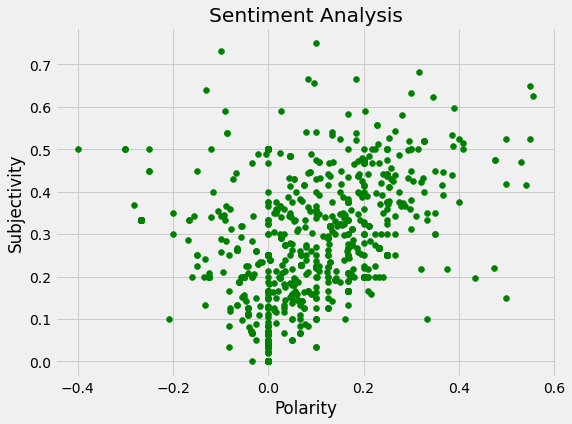

In [35]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color = 'Green')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [40]:
positive_tweets = df[df['Tweet_type'] == 'Positive Tweet']
round((positive_tweets.shape[0] / df.shape[0]) * 100 , 2)

52.2

In [41]:
negative_tweets = df[df['Tweet_type'] == 'Negative Tweet']
round((negative_tweets.shape[0] / df.shape[0]) * 100 , 2)

15.0

In [42]:
neutral_tweets = df[df['Tweet_type'] == 'Neutral Tweet']
round((neutral_tweets.shape[0] / df.shape[0]) * 100 , 2)

32.8

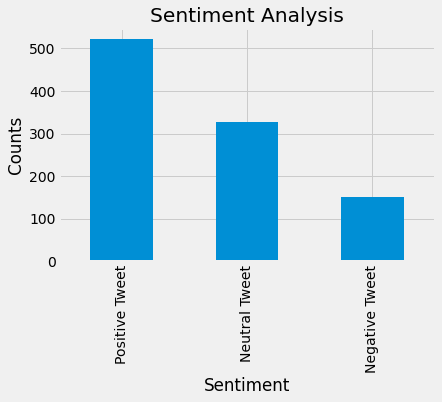

In [44]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
df['Tweet_type'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Tweet_type'].value_counts().plot(kind = 'bar')
plt.show()